## Problem 1

Consider AR(2) process
$$
X_t = X_{t-1} - \tfrac12 X_{t-2} + Z_t
$$

1. Find the characteristic polynomial $\phi(B)$.
2. Write out equation $\phi(B) = 0$, find its roots.s
3. Locate roots in or out cmoplex unit circle, make conclusion about stationarity.
4. Write out concrete Yule-Walker equation for $k=1$, use it to find ACF at lag 1, $\rho(1)$.
5. Write out Yule-Walker equation for $k > 1$, its general form solution for $\rho(k)$.
6. Write out auxillary equation, find its roots, make conclusion about form of ACF $\rho(k)$ (gradual decay vs damped sinusoid).

Bonus:
1. Rewrite roots of auxillary equation as trigonometric functions.
2. Using roots of auxillary equation, $\rho(0)$, $\rho(1)$ and a lot of trigonometry, find concrete expression for $\rho(k)$.

## Problem 2

Consider ARMA(1, 1) process
$$
X_t = 0.5 X_{t-1} + Z_t - 0.3 Z_{t-1}
$$

1. Find the characteristic polynomial $\phi(B)$.
2. Find the characteristic polynomial $\theta(B)$.
3. Find the characteristic polynomial $\psi(B) = \theta(B) / \phi(B)$.
4. Find the characteristic polynomial $\pi(B) = \phi(B) / \theta(B)$.
5. Make conclusions about stationarity.

## Problem 3

For ARIMA model
$$
(1 - B) (1 - 0.2 B) X_t = (1 - 0.5 B) Z_t
$$

1. Identify $p, d, q$
2. Determine if this process is stationary, if it is invertible.
3. Find first three coefficients in $\psi(B) = \theta(B) / \phi(B)$.
4. Find first four coefficients in $\pi(B) = \phi(B) / \theta(B)$.
5. Compare with coefficients from Problem 2, note the difference and try to guess its origin.
6. Use the model equation to find expressions for one- and two-step ahead predictions. Try to guess the recursive form for $k$-step-ahead prediction.

## Problem 4

Install data from [here](https://pypi.org/project/astsadata/)

In [1]:
!pip install astsdata

ERROR: Could not find a version that satisfies the requirement astsdata (from versions: none)
ERROR: No matching distribution found for astsdata


Pick a dataset to your liking (descriptions [here]([here](https://github.com/nickpoison/astsa/blob/master/fun_with_astsa/fun_with_astsa.md#1-data)))

In [2]:
import pandas as pd

In [3]:
from astsadata import jj

/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/astsadata/astsadata.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  birth = pd.read_csv(f"{path}/data/birth.csv", index_col=0, parse_dates=True)
/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/astsadata/astsadata.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cardox = pd.read_csv(f"{path}/data/cardox.csv", index_col=0, parse_dates=True)
/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/astsadata/astsadata.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  chicken = 

In [4]:
jj.head()

,value
index,
1960Q1,0.71
1960Q2,0.63
1960Q3,0.85
1960Q4,0.44
1961Q1,0.61


In [5]:
freq = jj.index.freq.freqstr

Create a TimeSeries object, minding the frequency

In [6]:
from darts import TimeSeries

In [7]:
jj_ts = TimeSeries.from_series(
    jj.set_index(
        pd.date_range(
            jj.index[0].start_time.date(),
            periods=len(jj),
            freq=freq,
            inclusive="both"
        )
    )
)

<Axes: xlabel='time'>

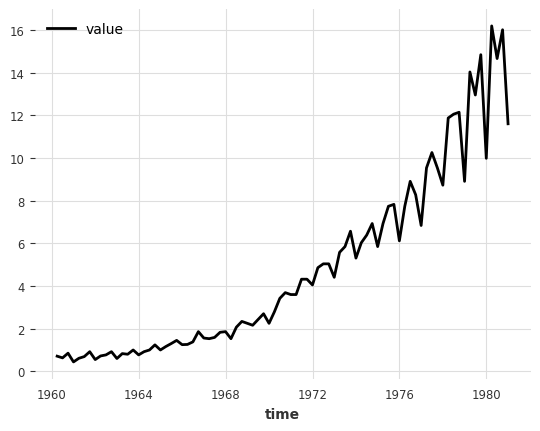

In [8]:
jj_ts.plot()

## Visualize data

1. Make a plot of the series
2. Analyze the distribution of the feature using histogram of its values
3. In case the variance is not constant, make a transformation (e.g. log)
4. Make conclusions about variation (trends, seasonality, cycles)
5. Split your data into train and test

In [9]:
# your code here

## Estimate ARIMA

1. Plot series, perform statistical tests for stationarity, make conclusions about differencing order $D$ and $d$
2. Plot ACF and PACF, find model orders $p$, $q$ and $P, Q$
3. Fit a SARIMA model on train set
4. Check the properties of residuals
5. Fit an AutoARIMA on train set, try supplying it with e.g. $start_p$ that you found
6. Check the properties of residuals
7. Make forecasts with your ARIMA and AutoARIMA on test set

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as tsa # tsa.stattools.kpss, tsa.stattools.adfuller

In [ ]:
from darts.utils.statistics import plot_acf, plot_pacf

In [ ]:
from darts.models import ARIMA, StatsForecastAutoARIMA

In [10]:
# your code here

## Estimate ETS

1. Use AutoETS to find the optimal combination of trend/seasonality/error on train set
3. Check the properties of residuals
4. Make forecast on test set

In [ ]:
from darts.models import StatsForecastAutoETS

In [11]:
# your code here

## Compare

Compare the models on test set using MSE.

In [12]:
# your code here